# Final Project: Vegetation Changes During the Younger Dryas Across the Eastern United States

# Introduction and Motivation
As part of my research at Lamont, I work on analyzing pollen samples from sediment cores to understand how vegetation has changed in New York since the last deglaciation. The Younger Dryas (YD) is a period in Earth's history between 12,800-11,600 calendar years ago, characterized by an abrupt return to cold conditions during the transition between the last glacial period and the current interglacial period (Peteet 1995). The Younger Dryas was first discovered in Greenland ice cores. In New York, the Younger Dryas is clearly documented with palynological evidence. This is also the case in Europe. However, evidence for a Younger Dryas in the southern hemisphere is controversial, especially since Antarctic ice cores show a warming during this period. Even in areas outside of New England and Europe, while still in the northern hemisphere, palynological evidence for a Younger Dryas becomes less clear (Peteet 1995).

In this project, I use vegetation data from pollen analysis done over eastern North America dating back 18,000 years to see what changes occur before, during, and after the documented Younger Dryas period as we move south. I would like to answer the following questions: Where does Eastern North America’s vegetation show a Younger Dryas? Since the Younger Dryas is most prominent/well studied in the Northeast of North America and Europe, what is the extent of it as we move south down Eastern North America? Does pollen evidence of a return to a cold period get weaker/stronger/how does the signal change if it does?

The data used was obtained from NOAA (https://doi.org/10.25921/820f-1785).

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Step 1: Pull the datasets and make adjustments for use.

In [2]:
veg_codes = 'numberto.veg.txt'

In [3]:
df1 = pd.read_csv(veg_codes, sep='\t\t')
df1

,veg_code,veg_type
0,5,Tundra
1,15,Forest Tundra
2,25,Boreal Forest
3,35,Mixed Forest
4,45,Deciduous Forest
5,55,Aspen Parkland
6,65,Prairie
7,75,Southeast Forest
8,95,No Analog
9,99,No Data


In [4]:
lat_lon_codes = 'latlonxy.dat.txt'

In [5]:
df2 = pd.read_csv(lat_lon_codes, sep='\\s+')
df2.head()

,lat_code,lon_code,lat,lon
0,8,44,69.87,-67.68
1,9,41,69.99,-75.97
2,9,42,69.68,-73.50
3,9,43,69.35,-71.07
4,9,44,68.99,-68.71


In [6]:
mod_veg_codes = 'modrnveg.dat.txt'

In [7]:
df3 = pd.read_csv(mod_veg_codes, sep='\\s+')
df3.head()

,lat_code,lon_code,veg_code
0,17.0,30.0,15.0
1,17.0,31.0,15.0
2,17.0,32.0,5.0
3,17.0,33.0,5.0
4,17.0,34.0,5.0


In [8]:
foss_veg_data = 'fossveg.dat.txt'

In [9]:
df4 = pd.read_csv(foss_veg_data, sep='\\s+')
df4.head()

,lat_code,lon_code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,17.0,32.0,5.0,5.0,5.0,5.0,5.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,17.0,33.0,15.0,5.0,5.0,5.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
2,17.0,34.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3,17.0,35.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
4,17.0,36.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


In [10]:
# Since the datasets are all separated, I need to merge some to make the data easier to analyze

mod_veg_lat_lon = pd.merge(df2, df3)
mod_veg_lat_lon.head()

,lat_code,lon_code,lat,lon,veg_code
0,17,32,63.82,-100.00,5.0
1,17,33,63.81,-97.86,5.0
2,17,34,63.77,-95.70,5.0
3,17,35,63.71,-93.57,5.0
4,17,36,63.62,-91.43,5.0


In [11]:
dataf = pd.merge(mod_veg_lat_lon, df4)
dataf.head()

,lat_code,lon_code,lat,lon,veg_code,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,17,32,63.82,-100.00,5.0,5.0,5.0,5.0,5.0,5.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,17,33,63.81,-97.86,5.0,15.0,5.0,5.0,5.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
2,17,34,63.77,-95.70,5.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3,17,35,63.71,-93.57,5.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
4,17,36,63.62,-91.43,5.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


In [12]:
# Renaming for clarity

dataf_ren = dataf.rename(columns={'veg_code': 'modveg_code'})

In [13]:
# Splitting north, mid, and south regions of the eastern US with all time periods present

# North region df
data_north_all = dataf_ren[(dataf_ren['lat']<=50) & (dataf_ren['lat']>=43)]

# Mid region df
data_mid_all = dataf_ren[(dataf_ren['lat']<=42) & (dataf_ren['lat']>=34)]

# South region df
data_south_all = dataf_ren[(dataf_ren['lat']<=33) & (dataf_ren['lat']>=23)]

In [14]:
# Making a north, mid, and south df for the three millennia before the YD (14-16)

north_pre_YD = data_north_all.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','17', '18'], axis=1)

mid_pre_YD = data_mid_all.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','17', '18'], axis=1)

south_pre_YD = data_south_all.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','17', '18'], axis=1)

In [15]:
# Replace vegetation code numbers with vegetation types for north pre YD data

north_pre_YD['14'].replace(5.0, 'Tundra', inplace=True)
north_pre_YD['14'].replace(15.0, 'Forest Tundra', inplace=True)
north_pre_YD['14'].replace(25.0, 'Boreal Forest', inplace=True)
north_pre_YD['14'].replace(35.0, 'Mixed Forest', inplace=True)
north_pre_YD['14'].replace(45.0, 'Deciduous Forest', inplace=True)
north_pre_YD['14'].replace(55.0, 'Aspen Parkland', inplace=True)
north_pre_YD['14'].replace(65.0, 'Prairie', inplace=True)
north_pre_YD['14'].replace(75.0, 'Southeast Forest', inplace=True)
north_pre_YD['14'].replace(95.0, 'No Analog', inplace=True)

north_pre_YD['15'].replace(5.0, 'Tundra', inplace=True)
north_pre_YD['15'].replace(15.0, 'Forest Tundra', inplace=True)
north_pre_YD['15'].replace(25.0, 'Boreal Forest', inplace=True)
north_pre_YD['15'].replace(35.0, 'Mixed Forest', inplace=True)
north_pre_YD['15'].replace(45.0, 'Deciduous Forest', inplace=True)
north_pre_YD['15'].replace(55.0, 'Aspen Parkland', inplace=True)
north_pre_YD['15'].replace(65.0, 'Prairie', inplace=True)
north_pre_YD['15'].replace(75.0, 'Southeast Forest', inplace=True)
north_pre_YD['15'].replace(95.0, 'No Analog', inplace=True)

north_pre_YD['16'].replace(5.0, 'Tundra', inplace=True)
north_pre_YD['16'].replace(15.0, 'Forest Tundra', inplace=True)
north_pre_YD['16'].replace(25.0, 'Boreal Forest', inplace=True)
north_pre_YD['16'].replace(35.0, 'Mixed Forest', inplace=True)
north_pre_YD['16'].replace(45.0, 'Deciduous Forest', inplace=True)
north_pre_YD['16'].replace(55.0, 'Aspen Parkland', inplace=True)
north_pre_YD['16'].replace(65.0, 'Prairie', inplace=True)
north_pre_YD['16'].replace(75.0, 'Southeast Forest', inplace=True)
north_pre_YD['16'].replace(95.0, 'No Analog', inplace=True)

north_pre_YD.replace(99.0, np.nan, inplace=True)

#Replace vegetation code numbers with vegetation types for mid pre YD data

mid_pre_YD['14'].replace(5.0, 'Tundra', inplace=True)
mid_pre_YD['14'].replace(15.0, 'Forest Tundra', inplace=True)
mid_pre_YD['14'].replace(25.0, 'Boreal Forest', inplace=True)
mid_pre_YD['14'].replace(35.0, 'Mixed Forest', inplace=True)
mid_pre_YD['14'].replace(45.0, 'Deciduous Forest', inplace=True)
mid_pre_YD['14'].replace(55.0, 'Aspen Parkland', inplace=True)
mid_pre_YD['14'].replace(65.0, 'Prairie', inplace=True)
mid_pre_YD['14'].replace(75.0, 'Southeast Forest', inplace=True)
mid_pre_YD['14'].replace(95.0, 'No Analog', inplace=True)

mid_pre_YD['15'].replace(5.0, 'Tundra', inplace=True)
mid_pre_YD['15'].replace(15.0, 'Forest Tundra', inplace=True)
mid_pre_YD['15'].replace(25.0, 'Boreal Forest', inplace=True)
mid_pre_YD['15'].replace(35.0, 'Mixed Forest', inplace=True)
mid_pre_YD['15'].replace(45.0, 'Deciduous Forest', inplace=True)
mid_pre_YD['15'].replace(55.0, 'Aspen Parkland', inplace=True)
mid_pre_YD['15'].replace(65.0, 'Prairie', inplace=True)
mid_pre_YD['15'].replace(75.0, 'Southeast Forest', inplace=True)
mid_pre_YD['15'].replace(95.0, 'No Analog', inplace=True)

mid_pre_YD['16'].replace(5.0, 'Tundra', inplace=True)
mid_pre_YD['16'].replace(15.0, 'Forest Tundra', inplace=True)
mid_pre_YD['16'].replace(25.0, 'Boreal Forest', inplace=True)
mid_pre_YD['16'].replace(35.0, 'Mixed Forest', inplace=True)
mid_pre_YD['16'].replace(45.0, 'Deciduous Forest', inplace=True)
mid_pre_YD['16'].replace(55.0, 'Aspen Parkland', inplace=True)
mid_pre_YD['16'].replace(65.0, 'Prairie', inplace=True)
mid_pre_YD['16'].replace(75.0, 'Southeast Forest', inplace=True)
mid_pre_YD['16'].replace(95.0, 'No Analog', inplace=True)

mid_pre_YD.replace(99.0, np.nan, inplace=True)

# Replace vegetation code numbers with vegetation types for south pre YD data

south_pre_YD['14'].replace(5.0, 'Tundra', inplace=True)
south_pre_YD['14'].replace(15.0, 'Forest Tundra', inplace=True)
south_pre_YD['14'].replace(25.0, 'Boreal Forest', inplace=True)
south_pre_YD['14'].replace(35.0, 'Mixed Forest', inplace=True)
south_pre_YD['14'].replace(45.0, 'Deciduous Forest', inplace=True)
south_pre_YD['14'].replace(55.0, 'Aspen Parkland', inplace=True)
south_pre_YD['14'].replace(65.0, 'Prairie', inplace=True)
south_pre_YD['14'].replace(75.0, 'Southeast Forest', inplace=True)
south_pre_YD['14'].replace(95.0, 'No Analog', inplace=True)

south_pre_YD['15'].replace(5.0, 'Tundra', inplace=True)
south_pre_YD['15'].replace(15.0, 'Forest Tundra', inplace=True)
south_pre_YD['15'].replace(25.0, 'Boreal Forest', inplace=True)
south_pre_YD['15'].replace(35.0, 'Mixed Forest', inplace=True)
south_pre_YD['15'].replace(45.0, 'Deciduous Forest', inplace=True)
south_pre_YD['15'].replace(55.0, 'Aspen Parkland', inplace=True)
south_pre_YD['15'].replace(65.0, 'Prairie', inplace=True)
south_pre_YD['15'].replace(75.0, 'Southeast Forest', inplace=True)
south_pre_YD['15'].replace(95.0, 'No Analog', inplace=True)

south_pre_YD['16'].replace(5.0, 'Tundra', inplace=True)
south_pre_YD['16'].replace(15.0, 'Forest Tundra', inplace=True)
south_pre_YD['16'].replace(25.0, 'Boreal Forest', inplace=True)
south_pre_YD['16'].replace(35.0, 'Mixed Forest', inplace=True)
south_pre_YD['16'].replace(45.0, 'Deciduous Forest', inplace=True)
south_pre_YD['16'].replace(55.0, 'Aspen Parkland', inplace=True)
south_pre_YD['16'].replace(65.0, 'Prairie', inplace=True)
south_pre_YD['16'].replace(75.0, 'Southeast Forest', inplace=True)
south_pre_YD['16'].replace(95.0, 'No Analog', inplace=True)

south_pre_YD.replace(99.0, np.nan, inplace=True)

In [16]:
# Making a north, mid, and south df for the three millennia after the YD (8-10)

north_post_YD = data_north_all.drop(['1', '2', '3', '4', '5', '6', '7', '11', '12', '13', '14', '15', '16', '17', '18'], axis=1)

mid_post_YD = data_mid_all.drop(['1', '2', '3', '4', '5', '6', '7', '11', '12', '13', '14', '15', '16', '17', '18'], axis=1)

south_post_YD = data_south_all.drop(['1', '2', '3', '4', '5', '6', '7', '11', '12', '13', '14', '15', '16', '17', '18'], axis=1)

In [17]:
# Replace vegetation code numbers with vegetation types for north post YD data

north_post_YD['8'].replace(5.0, 'Tundra', inplace=True)
north_post_YD['8'].replace(15.0, 'Forest Tundra', inplace=True)
north_post_YD['8'].replace(25.0, 'Boreal Forest', inplace=True)
north_post_YD['8'].replace(35.0, 'Mixed Forest', inplace=True)
north_post_YD['8'].replace(45.0, 'Deciduous Forest', inplace=True)
north_post_YD['8'].replace(55.0, 'Aspen Parkland', inplace=True)
north_post_YD['8'].replace(65.0, 'Prairie', inplace=True)
north_post_YD['8'].replace(75.0, 'Southeast Forest', inplace=True)
north_post_YD['8'].replace(95.0, 'No Analog', inplace=True)

north_post_YD['9'].replace(5.0, 'Tundra', inplace=True)
north_post_YD['9'].replace(15.0, 'Forest Tundra', inplace=True)
north_post_YD['9'].replace(25.0, 'Boreal Forest', inplace=True)
north_post_YD['9'].replace(35.0, 'Mixed Forest', inplace=True)
north_post_YD['9'].replace(45.0, 'Deciduous Forest', inplace=True)
north_post_YD['9'].replace(55.0, 'Aspen Parkland', inplace=True)
north_post_YD['9'].replace(65.0, 'Prairie', inplace=True)
north_post_YD['9'].replace(75.0, 'Southeast Forest', inplace=True)
north_post_YD['9'].replace(95.0, 'No Analog', inplace=True)

north_post_YD['10'].replace(5.0, 'Tundra', inplace=True)
north_post_YD['10'].replace(15.0, 'Forest Tundra', inplace=True)
north_post_YD['10'].replace(25.0, 'Boreal Forest', inplace=True)
north_post_YD['10'].replace(35.0, 'Mixed Forest', inplace=True)
north_post_YD['10'].replace(45.0, 'Deciduous Forest', inplace=True)
north_post_YD['10'].replace(55.0, 'Aspen Parkland', inplace=True)
north_post_YD['10'].replace(65.0, 'Prairie', inplace=True)
north_post_YD['10'].replace(75.0, 'Southeast Forest', inplace=True)
north_post_YD['10'].replace(95.0, 'No Analog', inplace=True)

north_post_YD.replace(99.0, np.nan, inplace=True)

# Replace vegetation code numbers with vegetation types for mid post YD data

mid_post_YD['8'].replace(5.0, 'Tundra', inplace=True)
mid_post_YD['8'].replace(15.0, 'Forest Tundra', inplace=True)
mid_post_YD['8'].replace(25.0, 'Boreal Forest', inplace=True)
mid_post_YD['8'].replace(35.0, 'Mixed Forest', inplace=True)
mid_post_YD['8'].replace(45.0, 'Deciduous Forest', inplace=True)
mid_post_YD['8'].replace(55.0, 'Aspen Parkland', inplace=True)
mid_post_YD['8'].replace(65.0, 'Prairie', inplace=True)
mid_post_YD['8'].replace(75.0, 'Southeast Forest', inplace=True)
mid_post_YD['8'].replace(95.0, 'No Analog', inplace=True)

mid_post_YD['9'].replace(5.0, 'Tundra', inplace=True)
mid_post_YD['9'].replace(15.0, 'Forest Tundra', inplace=True)
mid_post_YD['9'].replace(25.0, 'Boreal Forest', inplace=True)
mid_post_YD['9'].replace(35.0, 'Mixed Forest', inplace=True)
mid_post_YD['9'].replace(45.0, 'Deciduous Forest', inplace=True)
mid_post_YD['9'].replace(55.0, 'Aspen Parkland', inplace=True)
mid_post_YD['9'].replace(65.0, 'Prairie', inplace=True)
mid_post_YD['9'].replace(75.0, 'Southeast Forest', inplace=True)
mid_post_YD['9'].replace(95.0, 'No Analog', inplace=True)

mid_post_YD['10'].replace(5.0, 'Tundra', inplace=True)
mid_post_YD['10'].replace(15.0, 'Forest Tundra', inplace=True)
mid_post_YD['10'].replace(25.0, 'Boreal Forest', inplace=True)
mid_post_YD['10'].replace(35.0, 'Mixed Forest', inplace=True)
mid_post_YD['10'].replace(45.0, 'Deciduous Forest', inplace=True)
mid_post_YD['10'].replace(55.0, 'Aspen Parkland', inplace=True)
mid_post_YD['10'].replace(65.0, 'Prairie', inplace=True)
mid_post_YD['10'].replace(75.0, 'Southeast Forest', inplace=True)
mid_post_YD['10'].replace(95.0, 'No Analog', inplace=True)

mid_post_YD.replace(99.0, np.nan, inplace=True)

# Replace vegetation code numbers with vegetation types for south post YD data

south_post_YD['8'].replace(5.0, 'Tundra', inplace=True)
south_post_YD['8'].replace(15.0, 'Forest Tundra', inplace=True)
south_post_YD['8'].replace(25.0, 'Boreal Forest', inplace=True)
south_post_YD['8'].replace(35.0, 'Mixed Forest', inplace=True)
south_post_YD['8'].replace(45.0, 'Deciduous Forest', inplace=True)
south_post_YD['8'].replace(55.0, 'Aspen Parkland', inplace=True)
south_post_YD['8'].replace(65.0, 'Prairie', inplace=True)
south_post_YD['8'].replace(75.0, 'Southeast Forest', inplace=True)
south_post_YD['8'].replace(95.0, 'No Analog', inplace=True)

south_post_YD['9'].replace(5.0, 'Tundra', inplace=True)
south_post_YD['9'].replace(15.0, 'Forest Tundra', inplace=True)
south_post_YD['9'].replace(25.0, 'Boreal Forest', inplace=True)
south_post_YD['9'].replace(35.0, 'Mixed Forest', inplace=True)
south_post_YD['9'].replace(45.0, 'Deciduous Forest', inplace=True)
south_post_YD['9'].replace(55.0, 'Aspen Parkland', inplace=True)
south_post_YD['9'].replace(65.0, 'Prairie', inplace=True)
south_post_YD['9'].replace(75.0, 'Southeast Forest', inplace=True)
south_post_YD['9'].replace(95.0, 'No Analog', inplace=True)

south_post_YD['10'].replace(5.0, 'Tundra', inplace=True)
south_post_YD['10'].replace(15.0, 'Forest Tundra', inplace=True)
south_post_YD['10'].replace(25.0, 'Boreal Forest', inplace=True)
south_post_YD['10'].replace(35.0, 'Mixed Forest', inplace=True)
south_post_YD['10'].replace(45.0, 'Deciduous Forest', inplace=True)
south_post_YD['10'].replace(55.0, 'Aspen Parkland', inplace=True)
south_post_YD['10'].replace(65.0, 'Prairie', inplace=True)
south_post_YD['10'].replace(75.0, 'Southeast Forest', inplace=True)
south_post_YD['10'].replace(95.0, 'No Analog', inplace=True)

south_post_YD.replace(99.0, np.nan, inplace=True)

In [18]:
# Making a north, mid, and south df for the YD period (11-13)
data_YD_north = data_north_all.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '14', '15', '16', '17', '18'], axis=1)

data_YD_mid = data_mid_all.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '14', '15', '16', '17', '18'], axis=1)

data_YD_south = data_south_all.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '14', '15', '16', '17', '18'], axis=1)

In [19]:
# Replace vegetation code numbers with vegetation types for north YD data

data_YD_north['modveg_code'].replace(5.0, 'Tundra', inplace=True)
data_YD_north['modveg_code'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_north['modveg_code'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_north['modveg_code'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_north['modveg_code'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_north['modveg_code'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_north['modveg_code'].replace(65.0, 'Prairie', inplace=True)
data_YD_north['modveg_code'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_north['modveg_code'].replace(95.0, 'No Analog', inplace=True)

data_YD_north['11'].replace(5.0, 'Tundra', inplace=True)
data_YD_north['11'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_north['11'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_north['11'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_north['11'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_north['11'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_north['11'].replace(65.0, 'Prairie', inplace=True)
data_YD_north['11'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_north['11'].replace(95.0, 'No Analog', inplace=True)

data_YD_north['12'].replace(5.0, 'Tundra', inplace=True)
data_YD_north['12'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_north['12'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_north['12'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_north['12'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_north['12'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_north['12'].replace(65.0, 'Prairie', inplace=True)
data_YD_north['12'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_north['12'].replace(95.0, 'No Analog', inplace=True)

data_YD_north['13'].replace(5.0, 'Tundra', inplace=True)
data_YD_north['13'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_north['13'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_north['13'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_north['13'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_north['13'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_north['13'].replace(65.0, 'Prairie', inplace=True)
data_YD_north['13'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_north['13'].replace(95.0, 'No Analog', inplace=True)

data_YD_north.replace(99.0, np.nan, inplace=True)

# Replace vegetation code numbers with vegetation types for mid YD data

data_YD_mid['modveg_code'].replace(5.0, 'Tundra', inplace=True)
data_YD_mid['modveg_code'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_mid['modveg_code'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_mid['modveg_code'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_mid['modveg_code'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_mid['modveg_code'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_mid['modveg_code'].replace(65.0, 'Prairie', inplace=True)
data_YD_mid['modveg_code'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_mid['modveg_code'].replace(95.0, 'No Analog', inplace=True)

data_YD_mid['11'].replace(5.0, 'Tundra', inplace=True)
data_YD_mid['11'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_mid['11'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_mid['11'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_mid['11'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_mid['11'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_mid['11'].replace(65.0, 'Prairie', inplace=True)
data_YD_mid['11'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_mid['11'].replace(95.0, 'No Analog', inplace=True)

data_YD_mid['12'].replace(5.0, 'Tundra', inplace=True)
data_YD_mid['12'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_mid['12'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_mid['12'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_mid['12'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_mid['12'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_mid['12'].replace(65.0, 'Prairie', inplace=True)
data_YD_mid['12'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_mid['12'].replace(95.0, 'No Analog', inplace=True)

data_YD_mid['13'].replace(5.0, 'Tundra', inplace=True)
data_YD_mid['13'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_mid['13'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_mid['13'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_mid['13'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_mid['13'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_mid['13'].replace(65.0, 'Prairie', inplace=True)
data_YD_mid['13'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_mid['13'].replace(95.0, 'No Analog', inplace=True)

data_YD_mid.replace(99.0, np.nan, inplace=True)

# Replace vegetation code numbers with vegetation types for south YD data

data_YD_south['modveg_code'].replace(5.0, 'Tundra', inplace=True)
data_YD_south['modveg_code'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_south['modveg_code'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_south['modveg_code'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_south['modveg_code'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_south['modveg_code'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_south['modveg_code'].replace(65.0, 'Prairie', inplace=True)
data_YD_south['modveg_code'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_south['modveg_code'].replace(95.0, 'No Analog', inplace=True)

data_YD_south['11'].replace(5.0, 'Tundra', inplace=True)
data_YD_south['11'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_south['11'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_south['11'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_south['11'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_south['11'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_south['11'].replace(65.0, 'Prairie', inplace=True)
data_YD_south['11'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_south['11'].replace(95.0, 'No Analog', inplace=True)

data_YD_south['12'].replace(5.0, 'Tundra', inplace=True)
data_YD_south['12'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_south['12'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_south['12'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_south['12'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_south['12'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_south['12'].replace(65.0, 'Prairie', inplace=True)
data_YD_south['12'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_south['12'].replace(95.0, 'No Analog', inplace=True)

data_YD_south['13'].replace(5.0, 'Tundra', inplace=True)
data_YD_south['13'].replace(15.0, 'Forest Tundra', inplace=True)
data_YD_south['13'].replace(25.0, 'Boreal Forest', inplace=True)
data_YD_south['13'].replace(35.0, 'Mixed Forest', inplace=True)
data_YD_south['13'].replace(45.0, 'Deciduous Forest', inplace=True)
data_YD_south['13'].replace(55.0, 'Aspen Parkland', inplace=True)
data_YD_south['13'].replace(65.0, 'Prairie', inplace=True)
data_YD_south['13'].replace(75.0, 'Southeast Forest', inplace=True)
data_YD_south['13'].replace(95.0, 'No Analog', inplace=True)

data_YD_south.replace(99.0, np.nan, inplace=True)

Step 2: Make a map (Figure #1) to show the north, mid, and south regions of the eastern US and their data points.

In [21]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

#  Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

In [22]:
projPC = ccrs.PlateCarree()
lonW = -100
lonE = -50
latS = 20
latN = 55
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

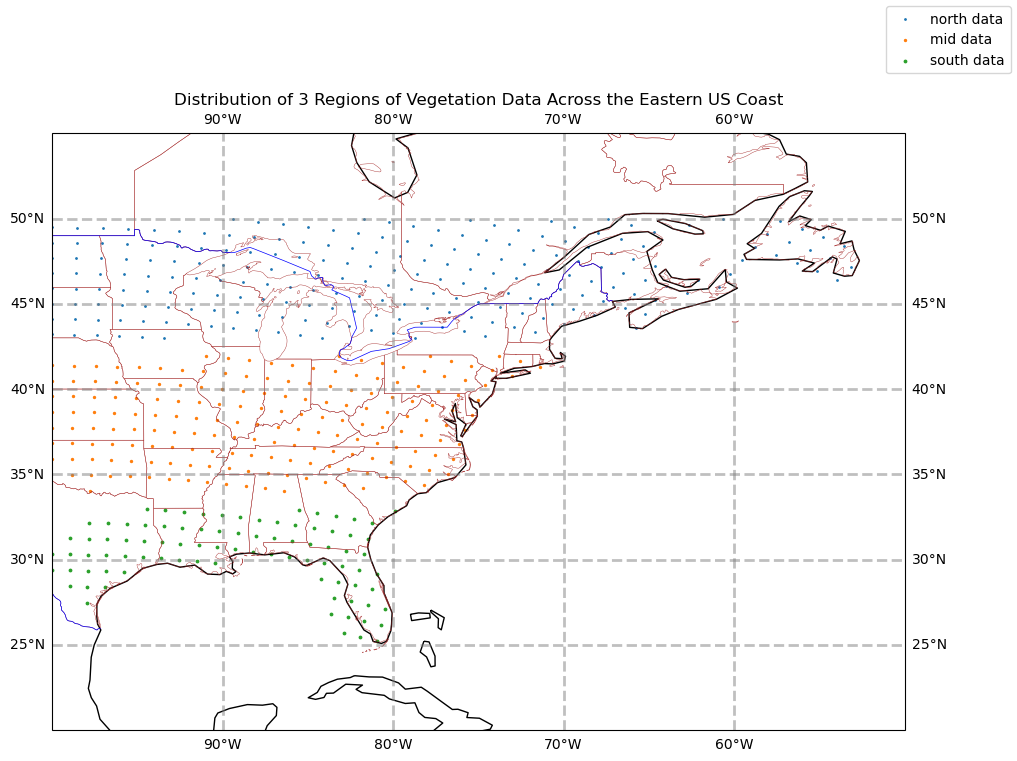

In [24]:
#projStr = ccrs.Stereographic(central_longitude=cLon, central_latitude=cLat)
projStr = ccrs.PlateCarree()
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projStr)
ax.set_title('Distribution of 3 Regions of Vegetation Data Across the Eastern US Coast') # Each region will be in different color points
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines(resolution=res, color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')
ax.scatter(data_north_all['lon'], data_north_all['lat'], 1, transform=ccrs.PlateCarree(), label = 'north data')
ax.scatter(data_mid_all['lon'], data_mid_all['lat'], 2, transform=ccrs.PlateCarree(), label = 'mid data')
ax.scatter(data_south_all['lon'], data_south_all['lat'], 3, transform=ccrs.PlateCarree(), label = 'south data')
fig.legend()

Step 3: Make a bar graph (Figure #2) to visually show what types of vegetation are seen today in each region.

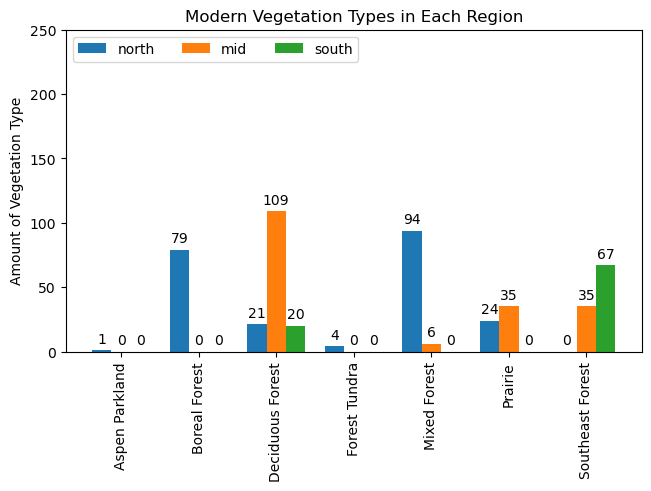

In [25]:
# Modern vegetation in the north, mid, and south regions

import matplotlib.pyplot as plt
import numpy as np

north_mod = data_YD_north.groupby('modveg_code').modveg_code.count()
mid_mod = data_YD_mid.groupby('modveg_code').modveg_code.count()
south_mod = data_YD_south.groupby('modveg_code').modveg_code.count()

# Modify all by adding indexes with 0 for data to make them all the same size

north_mod_alt = north_mod.copy()
north_mod_alt.loc['Southeast Forest']=0
north_mod_alt = north_mod_alt.sort_index()

mid_mod_alt = mid_mod.copy()
mid_mod_alt.loc['Aspen Parkland']=0
mid_mod_alt.loc['Boreal Forest']=0
mid_mod_alt.loc['Forest Tundra']=0
mid_mod_alt = mid_mod_alt.sort_index()

south_mod_alt = south_mod.copy()
south_mod_alt.loc['Prairie']=0
south_mod_alt.loc['Aspen Parkland']=0
south_mod_alt.loc['Mixed Forest']=0
south_mod_alt.loc['Boreal Forest']=0
south_mod_alt.loc['Forest Tundra']=0
south_mod_alt = south_mod_alt.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(north_mod_alt.index)

groupby_objects = {
    'north': north_mod_alt,
    'mid': mid_mod_alt,
    'south': south_mod_alt
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount of Vegetation Type')
ax.set_title('Modern Vegetation Types in Each Region')
ax.set_xticks(x + width, values)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)
plt.xticks(rotation=90)

plt.show()

Step 4: Make bar graphs (Figures #3-5) to visually show what types of vegetation were present during the pre YD period, during the YD period, and during the post YD period. Make subplots for each region of the eastern US.

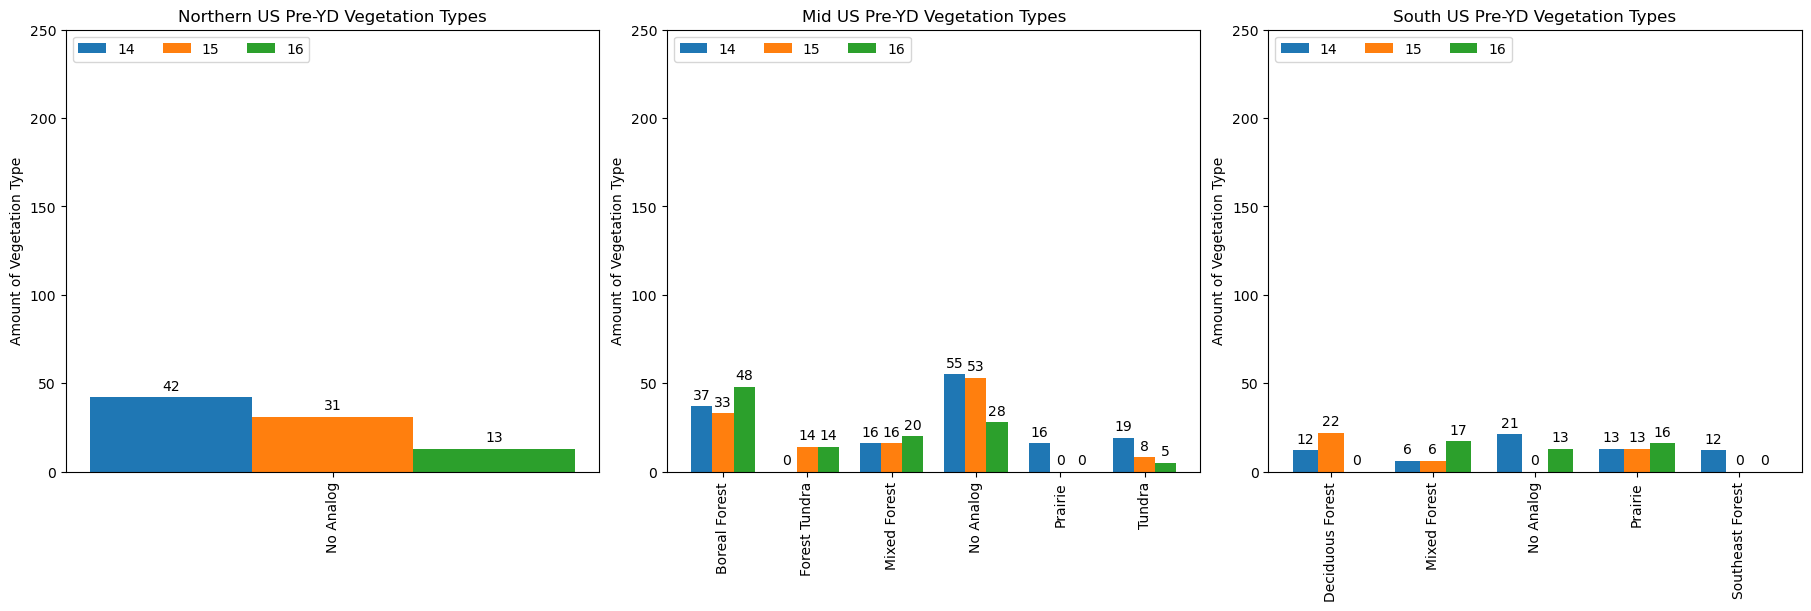

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Pre YD north

north_14 = north_pre_YD.groupby('14').size()
north_15 = north_pre_YD.groupby('15').size()
north_16 = north_pre_YD.groupby('16').size()

# No size modification needed
north_14mod = north_14.copy()
north_14mod = north_14mod.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(north_14mod.index)

groupby_objects = {
    '14': north_14,
    '15': north_15,
    '16': north_16
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), layout='constrained')

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax1.bar(x + offset, measurement, width, label=attribute)
    ax1.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Amount of Vegetation Type')
ax1.set_title('Northern US Pre-YD Vegetation Types')
ax1.set_xticks(x + width, values)
ax1.legend(loc='upper left', ncols=3)
ax1.set_ylim(0, 250)

# Pre YD mid

mid_14 = mid_pre_YD.groupby('14').size()
mid_15 = mid_pre_YD.groupby('15').size()
mid_16 = mid_pre_YD.groupby('16').size()

#Modify all to be the same size as each other
mid_14mod = mid_14.copy()
mid_14mod.loc['Forest Tundra']=0
mid_14mod = mid_14mod.sort_index()

mid_15mod = mid_15.copy()
mid_15mod.loc['Prairie']=0
mid_15mod = mid_15mod.sort_index()

mid_16mod = mid_16.copy()
mid_16mod.loc['Prairie']=0
mid_16mod = mid_16mod.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(mid_14mod.index)

groupby_objects = {
    '14': mid_14mod,
    '15': mid_15mod,
    '16': mid_16mod
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, measurement, width, label=attribute)
    ax2.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Amount of Vegetation Type')
ax2.set_title('Mid US Pre-YD Vegetation Types')
ax2.set_xticks(x + width, values)
ax2.legend(loc='upper left', ncols=3)
ax2.set_ylim(0, 250)

# Pre YD south

south_14 = south_pre_YD.groupby('14').size()
south_15 = south_pre_YD.groupby('15').size()
south_16 = south_pre_YD.groupby('16').size()

# Modify all to be the same size as each other
south_15mod = south_15.copy()
south_15mod.loc['No Analog']=0
south_15mod.loc['Southeast Forest']=0
south_15mod = south_15mod.sort_index()

south_16mod = south_16.copy()
south_16mod.loc['Deciduous Forest']=0
south_16mod.loc['Southeast Forest']=0
south_16mod = south_16mod.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(south_15mod.index)

groupby_objects = {
    '14': south_14,
    '15': south_15mod,
    '16': south_16mod
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax3.bar(x + offset, measurement, width, label=attribute)
    ax3.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_ylabel('Amount of Vegetation Type')
ax3.set_title('South US Pre-YD Vegetation Types')
ax3.set_xticks(x + width, values)
ax3.legend(loc='upper left', ncols=3)
ax3.set_ylim(0, 250)

for ax in (ax1, ax2, ax3):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

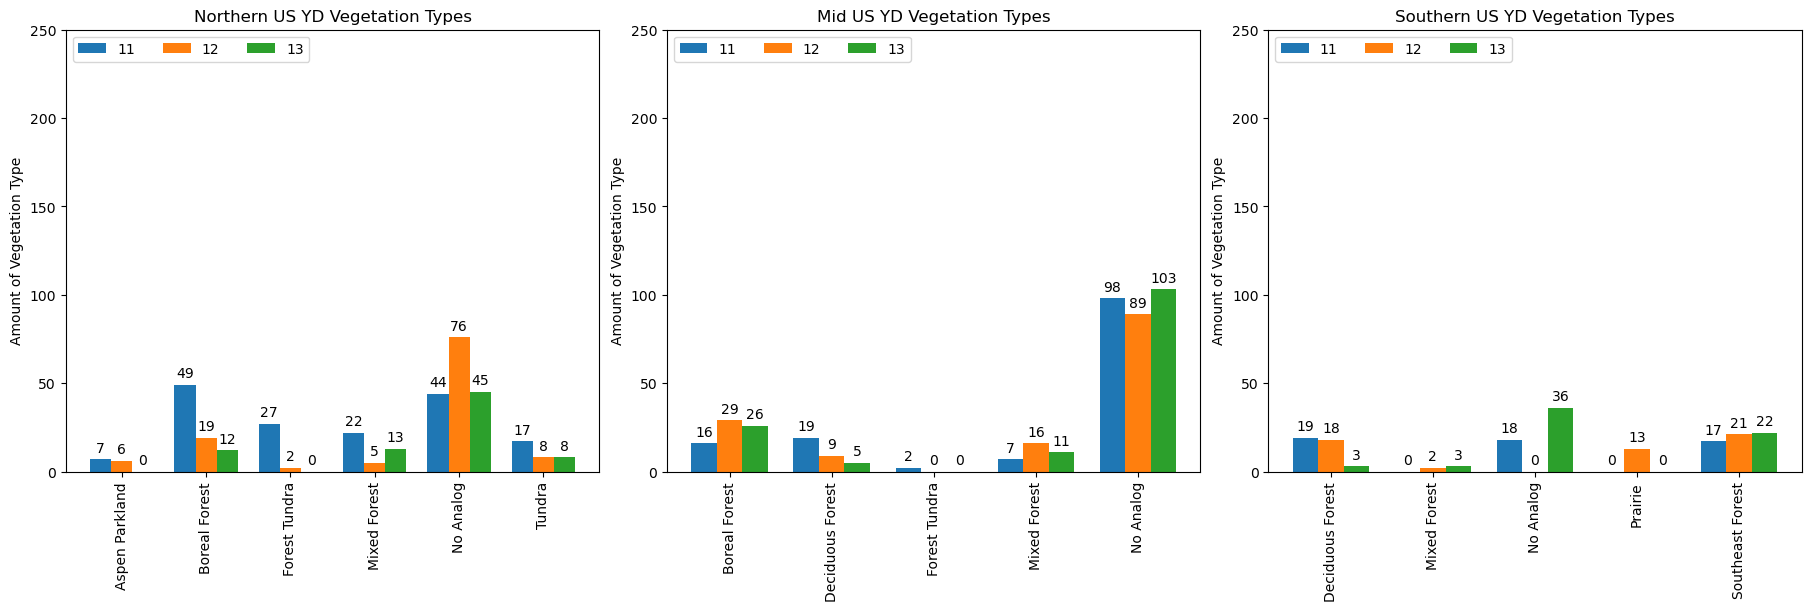

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# YD in the northern region

north_11 = data_YD_north.groupby('11').size()
north_12 = data_YD_north.groupby('12').size()
north_13 = data_YD_north.groupby('13').size()

# Modify north_13 to be the same size as north_11 and north_12 by adding a 15.0 (Forest Tundra) and 55.0 (Aspen Parkland) index with 0 for data
north_13mod = north_13.copy()
north_13mod.loc['Forest Tundra']=0
north_13mod.loc['Aspen Parkland']=0
north_13mod = north_13mod.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(north_13mod.index)

groupby_objects = {
    '11': north_11,
    '12': north_12,
    '13': north_13mod
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), layout='constrained')

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax1.bar(x + offset, measurement, width, label=attribute)
    ax1.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Amount of Vegetation Type')
ax1.set_title('Northern US YD Vegetation Types')
ax1.set_xticks(x + width, values)
ax1.legend(loc='upper left', ncols=3)
ax1.set_ylim(0, 250)

# YD in the mid region

mid_11 = data_YD_mid.groupby('11').size()
mid_12 = data_YD_mid.groupby('12').size()
mid_13 = data_YD_mid.groupby('13').size()

# Modify mid_12 and mid_13 to be the same size as mid_11 by adding a 15.0 (Forest Tundra) index with 0 for data
mid_12mod = mid_12.copy()
mid_12mod.loc['Forest Tundra']=0
mid_12mod = mid_12mod.sort_index()

mid_13mod = mid_13.copy()
mid_13mod.loc['Forest Tundra']=0
mid_13mod = mid_13mod.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(mid_12mod.index)

groupby_objects = {
    '11': mid_11,
    '12': mid_12mod,
    '13': mid_13mod
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, measurement, width, label=attribute)
    ax2.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Amount of Vegetation Type')
ax2.set_title('Mid US YD Vegetation Types')
ax2.set_xticks(x + width, values)
ax2.legend(loc='upper left', ncols=3)
ax2.set_ylim(0, 250)

# YD in the south region

south_11 = data_YD_south.groupby('11').size()
south_12 = data_YD_south.groupby('12').size()
south_13 = data_YD_south.groupby('13').size()

# Modify south_11 to be the same size as everything else
south_11mod = south_11.copy()
south_11mod.loc['Mixed Forest']=0
south_11mod.loc['Prairie']=0
south_11mod = south_11mod.sort_index()

# Modify mid_12 to be the same size as everything else
south_12mod = south_12.copy()
south_12mod.loc['No Analog']=0
south_12mod = south_12mod.sort_index()

# Modify mid_13 to be the same size as everything else
south_13mod = south_13.copy()
south_13mod.loc['Prairie']=0
south_13mod = south_13mod.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(south_11mod.index)

groupby_objects = {
    '11': south_11mod,
    '12': south_12mod,
    '13': south_13mod
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax3.bar(x + offset, measurement, width, label=attribute)
    ax3.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_ylabel('Amount of Vegetation Type')
ax3.set_title('Southern US YD Vegetation Types')
ax3.set_xticks(x + width, values)
ax3.legend(loc='upper left', ncols=3)
ax3.set_ylim(0, 250)

for ax in (ax1, ax2, ax3):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

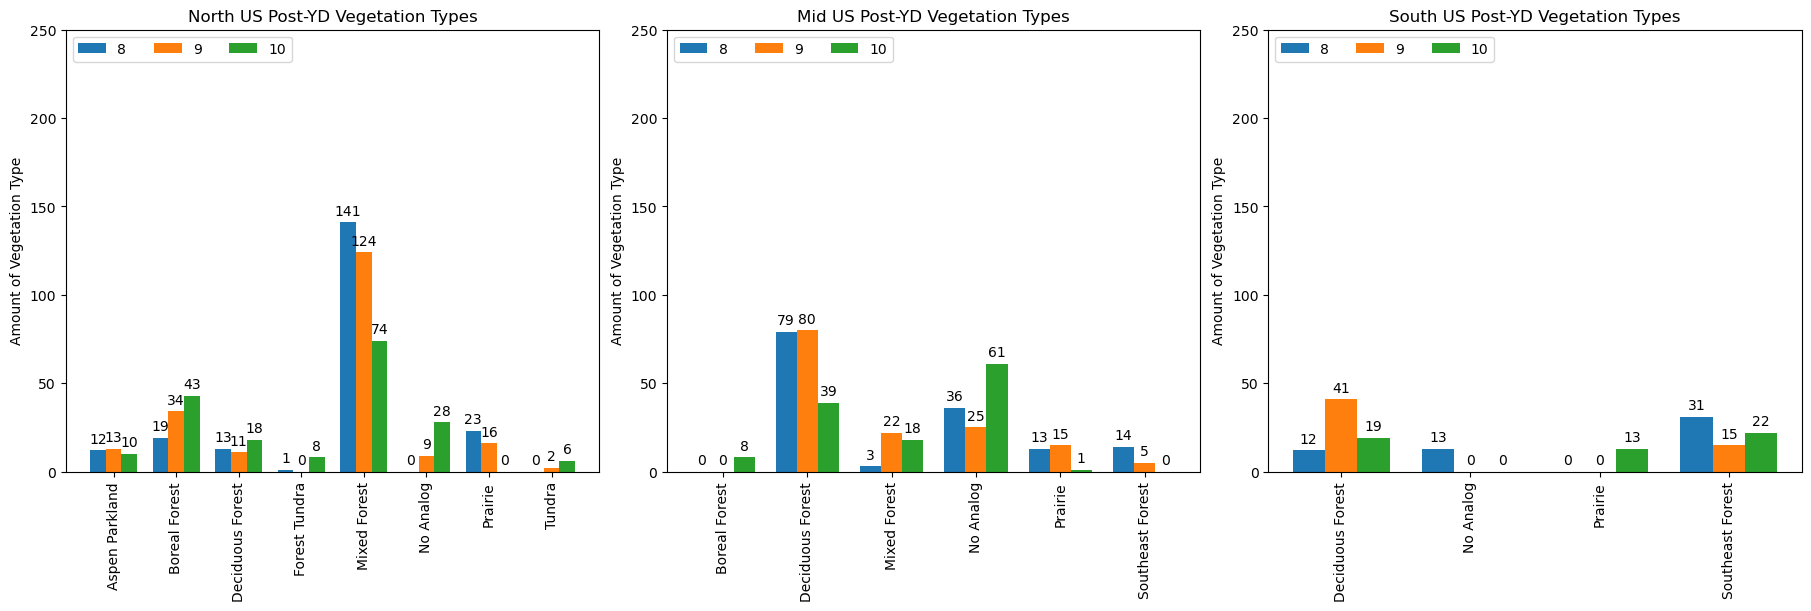

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Post YD north

north_8 = north_post_YD.groupby('8').size()
north_9 = north_post_YD.groupby('9').size()
north_10 = north_post_YD.groupby('10').size()

# Modify all to be the same as each other
north_8mod = north_8.copy()
north_8mod.loc['No Analog']=0
north_8mod.loc['Tundra']=0
north_8mod = north_8mod.sort_index()

north_9mod = north_9.copy()
north_9mod.loc['Forest Tundra']=0
north_9mod = north_9mod.sort_index()

north_10mod = north_10.copy()
north_10mod.loc['Prairie']=0
north_10mod = north_10mod.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(north_8mod.index)

groupby_objects = {
    '8': north_8mod,
    '9': north_9mod,
    '10': north_10mod
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), layout='constrained')

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax1.bar(x + offset, measurement, width, label=attribute)
    ax1.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Amount of Vegetation Type')
ax1.set_title('North US Post-YD Vegetation Types')
ax1.set_xticks(x + width, values)
ax1.legend(loc='upper left', ncols=3)
ax1.set_ylim(0, 250)

# Post YD mid

mid_8 = mid_post_YD.groupby('8').size()
mid_9 = mid_post_YD.groupby('9').size()
mid_10 = mid_post_YD.groupby('10').size()

# Modify all to be the same as each other
mid_8mod = mid_8.copy()
mid_8mod.loc['Boreal Forest']=0
mid_8mod = mid_8mod.sort_index()

mid_9mod = mid_9.copy()
mid_9mod.loc['Boreal Forest']=0
mid_9mod = mid_9mod.sort_index()

mid_10mod = mid_10.copy()
mid_10mod.loc['Southeast Forest']=0
mid_10mod = mid_10mod.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(mid_8mod.index)

groupby_objects = {
    '8': mid_8mod,
    '9': mid_9mod,
    '10': mid_10mod
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, measurement, width, label=attribute)
    ax2.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Amount of Vegetation Type')
ax2.set_title('Mid US Post-YD Vegetation Types')
ax2.set_xticks(x + width, values)
ax2.legend(loc='upper left', ncols=3)
ax2.set_ylim(0, 250)

# Post YD south

south_8 = south_post_YD.groupby('8').size()
south_9 = south_post_YD.groupby('9').size()
south_10 = south_post_YD.groupby('10').size()

# Modify all to be the same as each other
south_8mod = south_8.copy()
south_8mod.loc['Prairie']=0
south_8mod = south_8mod.sort_index()

south_9mod = south_9.copy()
south_9mod.loc['Prairie']=0
south_9mod.loc['No Analog']=0
south_9mod = south_9mod.sort_index()

south_10mod = south_10.copy()
south_10mod.loc['No Analog']=0
south_10mod = south_10mod.sort_index()

# Sort the values so they come out in order on the x-axis
values=np.sort(south_8mod.index)

groupby_objects = {
    '8': south_8mod,
    '9': south_9mod,
    '10': south_10mod
}

x = np.arange(len(values))  # The label locations
width = 0.25  # The width of the bars
multiplier = 0

for attribute, measurement in groupby_objects.items():
    offset = width * multiplier
    rects = ax3.bar(x + offset, measurement, width, label=attribute)
    ax3.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_ylabel('Amount of Vegetation Type')
ax3.set_title('South US Post-YD Vegetation Types')
ax3.set_xticks(x + width, values)
ax3.legend(loc='upper left', ncols=3)
ax3.set_ylim(0, 250)

for ax in (ax1, ax2, ax3):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

Step 5: Make a line graph (Figure #6) of the average vegetation as a climate proxy seen in over time in the north, mid, and south regions of the eastern US, highlighting the YD period.

Step 5 further explanation: The vegetation is originally coded in the dataframe as numbers. These numbers represent colder to warmer climate vegetation types as they increase, allowing us to use this information as a proxy for climate (general cold or warm conclusions can only be made, no exact temperature reconstructions).

Step 5 further further explanation: One of the vegetation codes is number 95.0, which has the category "No Analog". This means that the pollen stratigraphy in this core was not similar enough to any modern day stratigraphy to categorize. For the purposes of the original project this dataset was used for, a "No Analog" category is useful. For this project, it is not useful, and skews the results of the averages toward warmer climates since it is coded as a 95.0. I read the published paper that uses this data, and found a description of the general pollen types found in the most common "No Analog" cases they recorded. The description included various cold climate species as dominant, such as spruce, sedges, aspen, and birch (Overpeck et al 1992). Using the description, along with the map shown in the paper which depicts "No Analog" vegetation to be found in areas of transition, I interpreted the "No Analog" vegetation to be of a cold climate category. I placed it as a 20.0 on the coding scale, in between the "Tundra" and "Forest Tundra" categories. This may not be accurate of every and all of the "No Analog" cases, but is what I believe to be the most accurate interpretation of this category based on the information provided. This allowed me to move forward with calculating averages that were not so heavily biased towards warm-climate vegetation, leading to a possibly inaccurate interpretation of the results.

In [29]:
# Replacing north 99.0 ("No Data") with NaN, and 95.0 ("No Analog") with 20.0 (see "Step 5 further further explanation")

data_north_all.replace(99.0, np.nan, inplace=True)
data_north_all.replace(95.0, 20.0, inplace=True)
data_north_all_avg = data_north_all[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']].mean(axis=0)
print(data_north_all_avg)

1     37.918660
2     37.285714
3     38.190476
4     38.214286
5     39.285714
6     39.166667
7     38.732057
8     39.066986
9     36.507177
10    30.668449
11    22.590361
12    22.155172
13    21.730769
14    20.000000
15    20.000000
16    20.000000
17    20.000000
18          NaN
dtype: float64


In [30]:
# Replacing mid 99.0 ("No Data") with NaN, and 95.0 ("No Analog") with 20.0 (see "Step 5 further further explanation")

data_mid_all.replace(99.0, np.nan, inplace=True)
data_mid_all.replace(95.0, 20.0, inplace=True)
data_mid_all_avg = data_mid_all[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']].mean(axis=0)
print(data_mid_all_avg)

1     52.973856
2     50.524476
3     47.801418
4     49.492754
5     48.594771
6     47.325581
7     46.724138
8     43.275862
9     42.312925
10    30.472441
11    24.577465
12    24.265734
13    22.896552
14    26.013986
15    21.733871
16    23.434783
17    22.432432
18    23.674699
dtype: float64


In [31]:
# Replacing south 99.0 ("No Data") with NaN, and 95.0 ("No Analog") with 20.0 (see "Step 5 further further explanation")

data_south_all.replace(99.0, np.nan, inplace=True)
data_south_all.replace(95.0, 20.0, inplace=True)
data_south_all_avg = data_south_all[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']].mean(axis=0)
print(data_south_all_avg)

1     75.000000
2     75.000000
3     65.322581
4     72.288136
5     64.830508
6     65.892857
7     65.000000
8     55.803571
9     53.035714
10    62.037037
11    46.111111
12    61.111111
13    40.781250
14    45.546875
15    49.878049
16    41.195652
17    44.473684
18    42.857143
dtype: float64


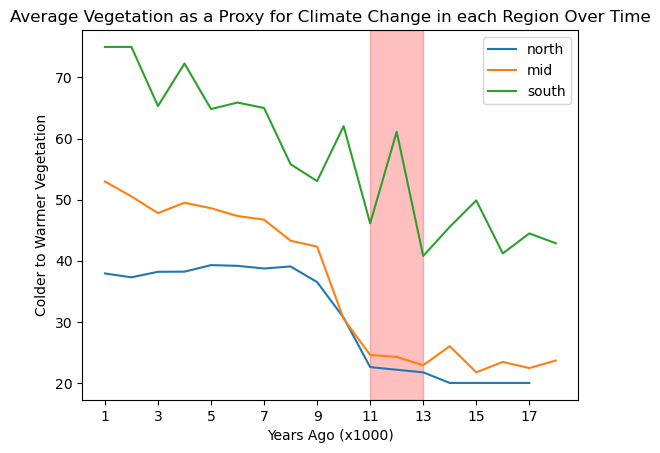

In [33]:
# Plot the averages of all three regions together, highlighting the Younger Dryas period

data_north_all_avg.plot(label='north')
data_mid_all_avg.plot(label='mid')
data_south_all_avg.plot(label='south')
plt.xlabel('Years Ago (x1000)')
plt.ylabel('Colder to Warmer Vegetation')
plt.title('Average Vegetation as a Proxy for Climate Change in each Region Over Time')
plt.legend()
plt.axvspan(10, 12, color='red', alpha=0.25)

Step 6: Create scatter subplots (Figure #7) of average vegetation as a climate proxy for pre, during, and post the YD to visually depict the climate geographically.

In [34]:
# Pre YD data for all regions

all_pre = dataf_ren.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','17', '18', 'modveg_code'], axis=1)
all_pre_nan = all_pre.replace(99.0, np.nan)
all_pre_nan_20 = all_pre_nan.replace(95.0, 20.0)
all_pre_nan_20['average'] = all_pre_nan_20[['14', '15', '16']].mean(axis=1)

# If the average equals NaN, replace it with a 99.0 so that an obviously lighter color will fill where there was no data
# ^This will also preserve the shape of the eastern US in the plots

all_pre_nan_20['average'] = all_pre_nan_20['average'].fillna(99.0)
all_pre_nan_20

,lat_code,lon_code,lat,lon,14,15,16,average
0,17,32,63.82,-100.00,NaN,NaN,NaN,99.000000
1,17,33,63.81,-97.86,NaN,NaN,NaN,99.000000
2,17,34,63.77,-95.70,NaN,NaN,NaN,99.000000
3,17,35,63.71,-93.57,NaN,NaN,NaN,99.000000
4,17,36,63.62,-91.43,NaN,NaN,NaN,99.000000
...,...,...,...,...,...,...,...,...
797,56,51,26.17,-80.71,75.0,45.0,65.0,61.666667
798,57,34,27.45,-97.95,NaN,NaN,NaN,99.000000
799,57,49,25.68,-82.89,75.0,45.0,65.0,61.666667
800,57,50,25.47,-81.92,75.0,45.0,65.0,61.666667


In [35]:
# During YD data for all regions

all_YD = dataf_ren.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '14', '15', '16', '17', '18', 'modveg_code'], axis=1)
all_YD_20 = all_YD.replace(95.0, 20.0)
all_YD_nan_20 = all_YD_20.replace(99.0, np.nan)
all_YD_nan_20['average'] = all_YD_nan_20[['11', '12', '13']].mean(axis=1)

# If the average equals NaN, replace it with a 99.0 so that an obviously lighter color will fill where there was no data
# ^This will also preserve the shape of the eastern US in the plots

all_YD_nan_20['average'] = all_YD_nan_20['average'].fillna(99.0)
all_YD_nan_20

,lat_code,lon_code,lat,lon,11,12,13,average
0,17,32,63.82,-100.00,NaN,NaN,NaN,99.0
1,17,33,63.81,-97.86,NaN,NaN,NaN,99.0
2,17,34,63.77,-95.70,NaN,NaN,NaN,99.0
3,17,35,63.71,-93.57,NaN,NaN,NaN,99.0
4,17,36,63.62,-91.43,NaN,NaN,NaN,99.0
...,...,...,...,...,...,...,...,...
797,56,51,26.17,-80.71,45.0,75.0,75.0,65.0
798,57,34,27.45,-97.95,NaN,NaN,NaN,99.0
799,57,49,25.68,-82.89,75.0,75.0,75.0,75.0
800,57,50,25.47,-81.92,75.0,75.0,75.0,75.0


In [36]:
# Post YD data for all regions

all_post = dataf_ren.drop(['1', '2', '3', '4', '5', '6', '7', '11', '12', '13', '14', '15', '16', '17', '18', 'modveg_code'], axis=1)
all_post_20 = all_post.replace(95.0, 20.0)
all_post_nan_20 = all_post_20.replace(99.0, np.nan)
all_post_nan_20['average'] = all_post_nan_20[['8', '9', '10']].mean(axis=1)

# If the average equals NaN, replace it with a 99.0 so that an obviously lighter color will fill where there was no data
# ^This will also preserve the shape of the eastern US in the plots

all_post_nan_20['average'] = all_post_nan_20['average'].fillna(99.0)
all_post_nan_20

,lat_code,lon_code,lat,lon,8,9,10,average
0,17,32,63.82,-100.00,NaN,NaN,NaN,99.0
1,17,33,63.81,-97.86,NaN,NaN,NaN,99.0
2,17,34,63.77,-95.70,NaN,NaN,NaN,99.0
3,17,35,63.71,-93.57,NaN,NaN,NaN,99.0
4,17,36,63.62,-91.43,NaN,NaN,NaN,99.0
...,...,...,...,...,...,...,...,...
797,56,51,26.17,-80.71,75.0,75.0,75.0,75.0
798,57,34,27.45,-97.95,NaN,NaN,NaN,99.0
799,57,49,25.68,-82.89,75.0,75.0,75.0,75.0
800,57,50,25.47,-81.92,75.0,75.0,75.0,75.0


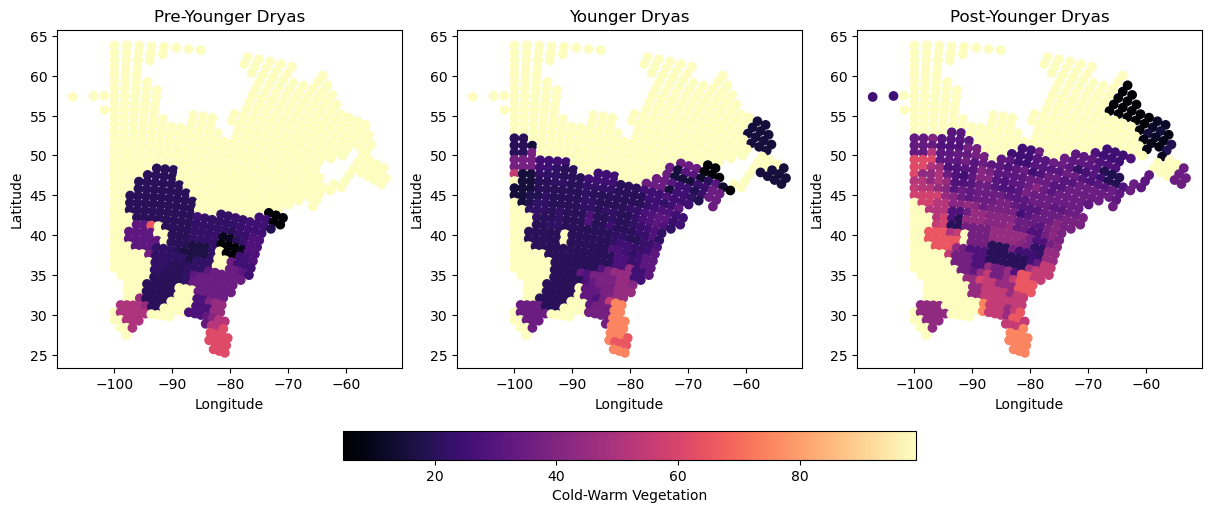

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(12,5), layout='constrained')

# ax[0]: plot averaged pre YD data for all regions
scatter1 = ax[0].scatter(all_pre_nan_20['lon'], all_pre_nan_20['lat'], c=all_pre_nan_20['average'], cmap='magma')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Pre-Younger Dryas')

# ax[1]: plot averaged YD data for all regions
scatter2 = ax[1].scatter(all_YD_nan_20['lon'], all_YD_nan_20['lat'], c=all_YD_nan_20['average'], cmap='magma')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title('Younger Dryas')

# ax[2]: plot averaged post YD for all regions
scatter3 = ax[2].scatter(all_post_nan_20['lon'], all_post_nan_20['lat'], c=all_post_nan_20['average'], cmap='magma')
ax[2].set_xlabel('Longitude')
ax[2].set_ylabel('Latitude')
ax[2].set_title('Post-Younger Dryas')

# Add colorbar at bottom of the figure
cbar = fig.colorbar(scatter3, ax=ax.ravel().tolist(), orientation='horizontal', shrink=0.5)
cbar.set_label('Cold-Warm Vegetation')

# Note: Modern will be separate since it has a different colorbar

Step 7: Create a scatter plot (Figure #8) of the average modern vegetation as a climate proxy for comparison with the pre, during, and post YD scatter plots.

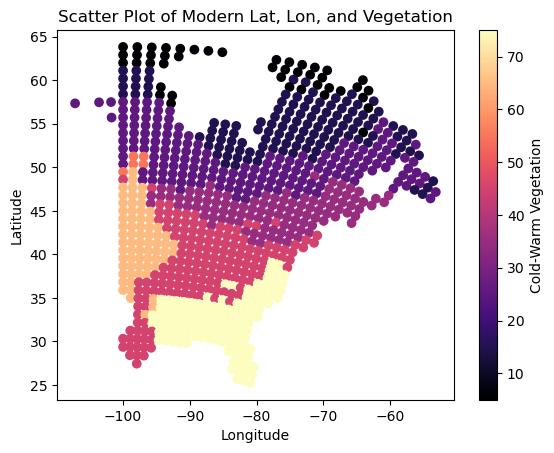

In [38]:
# Plotting modern vegetation data for all regions
# Note that there is no "No Data" category for the modern data, so the lightest color (value of 75.0) is referring to the warmest vegetation type/climate

plt.scatter(dataf_ren['lon'], dataf_ren['lat'], c=dataf_ren['modveg_code'], cmap='magma')
plt.colorbar(label='Cold-Warm Vegetation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Modern Lat, Lon, and Vegetation')
plt.show()

# Discussion and Conclusion
As seen in Figure 6 and Figure 7, overall evidence for a Younger Dryas period from this dataset is not explicitly clear. In the north and mid regions, we see that warming does plateau somewhat during the YD period (Figure 6). However, the south does not show the same trend. After a period of abrupt warming between 13,000-12,000 years ago, there is a sharp cooling seen in the south (Figure 6). This cooling ends abruptly and is followed by the warmest climate record up until that point. In fact, this is the case for all three regions. At 11,000 years before present, all regions of the eastern US warm abruptly, and reach what was a maximum warm climate for the post-glacial period up until that point (Figure 6). This abrupt change back to warming is consistent with Younger Dryas patterns. The Younger Dryas is also characterized by an abrupt cooling at its start, which is depicted starting at 12,000 years ago in the south region. However, this date is not consistent with when the YD cooling is believed to have started, closer to 13,000 years ago (Peteet 1995). This abrupt cooling is not seen in any other region.

A possible explanation for why the YD is not clearly depicted in the north and mid regions where it was expected to be seen is that this dataset is not robust enough to give clear records of pre-YD vegetation. As is seen in the pre-YD subplot in Figure 7, much of the north region is "No Data". While at this point in deglaciation, vegetation may have not yet have colonized the land to a substantial degree, it is also possible that sediment cores collected in this area were not able to go deep enough to collect samples for palynological analysis for this time period.

Overall, this data analysis shows possible, but not clear, evidence of a Younger Dryas period throughout the eastern US. The YD trend does seem to weaken once we reach the southern region of the US, with an overall weaker trend of cooling during the YD period. The north and mid regions see stronger, but not explicit, evidence of cooling with a plateau in the overall warming trend during the YD period.

There are still many questions to be answered about the Younger Dryas period. Many areas outside of Europe and the Northeastern US still lack robust studies on the topic, and the ocurrence of the event itself is still debated today in many areas of the northern hemisphere (Peteet 1995). It is important to continue research on the Younger Dryas, as it is evidence that the climate has potential to change very quickly. This is relevant to the unprecedented circumstances the climate is being subject to today due to anthropogenic greenhouse gases being pumped into the atmosphere-- we might not be able to predict if/when the climate may be sensitive to these new pressures, and change without warning.

# References
Dataset:

Overpeck, J.T.; Webb, R.S.; Webb, T. (1994-06-21): NOAA/WDS Paleoclimatology - Eastern North America 18,000 Year Vegetation Mapping. Using all subsets. NOAA National Centers for Environmental Information. https://doi.org/10.25921/820f-1785. Accessed 11/05/2024.


Other sources:

Peteet, D. (1995). Global younger dryas?. Quaternary International, 28, 93-104. https://doi.org/10.1016/1040-6182(95)00049-O.

Overpeck, J. T., Webb, R. S., & Webb III, T. (1992). Mapping eastern North American vegetation change of the past 18 ka: No-analogs and the future. Geology, 20(12), 1071-1074. https://doi.org/10.1130/0091-7613(1992)020<1071:MENAVC>2.3.CO;2.
